In [1]:
import os
import cv2
import glob
import random
import imageio
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import skimage.measure   
from skimage import data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.morphology import disk
from skimage.util import img_as_ubyte



In [6]:
train_glioma = glob.glob('Brain Tumor Classification Dataset/Training/glioma_tumor/*.jpg')
train_menignioma = glob.glob('Brain Tumor Classification Dataset/Training/meningioma_tumor/*.jpg')
train_pituitary = glob.glob('Brain Tumor Classification Dataset/Training/pituitary_tumor/*.jpg')
train_no = glob.glob('Brain Tumor Classification Dataset/Training/no_tumor/*.jpg')

#Test
test_glioma = glob.glob('Brain Tumor Classification Dataset/Testing/glioma_tumor/*.jpg')
test_menignioma = glob.glob('Brain Tumor Classification Dataset/Testing/meningioma_tumor/*.jpg')
test_pituitary = glob.glob('Brain Tumor Classification Dataset/Testing/pituitary_tumor/*.jpg')
test_no = glob.glob('Brain Tumor Classification Dataset/Testing/no_tumor/*.jpg')



In [7]:
train_glioma_number = len(train_glioma)
train_menignioma_number = len(train_menignioma)
train_pituitary_number = len(train_pituitary)
train_no_number = len(train_no)

test_glioma_number = len(test_glioma)
test_menignioma_number = len(test_menignioma)
test_pituitary_number = len(test_pituitary)
test_no_number = len(test_no)

print("Number of train_glioma: ",train_glioma_number)
print("Number of train_menignioma: ",train_menignioma_number)
print("Number of train_pituitary: ",train_pituitary_number)
print("Number of train_no: ",train_no_number)
print("Number of test_glioma: ",test_glioma_number)
print("Number of test_menignioma: ",train_menignioma_number)
print("Number of test_pituitary: ",train_pituitary_number)
print("Number of test_no: ",train_no_number)

Number of train_glioma:  826
Number of train_menignioma:  822
Number of train_pituitary:  827
Number of train_no:  395
Number of test_glioma:  100
Number of test_menignioma:  822
Number of test_pituitary:  827
Number of test_no:  395


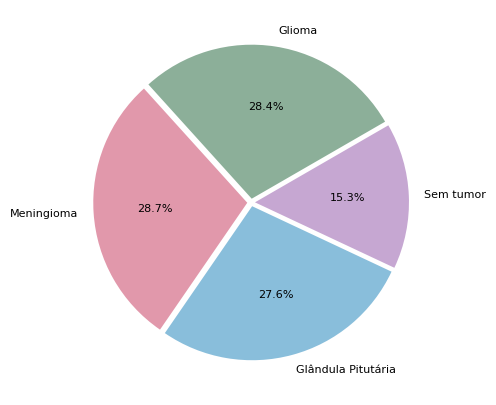

In [8]:
full_glioma = train_glioma_number + test_glioma_number
full_no_tumor = train_no_number + test_no_number
full_menignioma = train_menignioma_number + test_menignioma_number
full_pituitary = train_pituitary_number + test_pituitary_number

plt.figure(figsize=(5,5))
colors = ['#8CAF99','#E198AB',"#89BEDB","#C6A7D2"]
labels = ['Glioma', 'Meningioma', 'Glândula Pitutária', 'Sem tumor']

plt.rcParams.update({'font.size': 8})
plt.pie([full_glioma,
         full_menignioma,full_pituitary,full_no_tumor],
        labels=labels,
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);
plt.savefig("Distribuição do dataset.png", dpi=300)


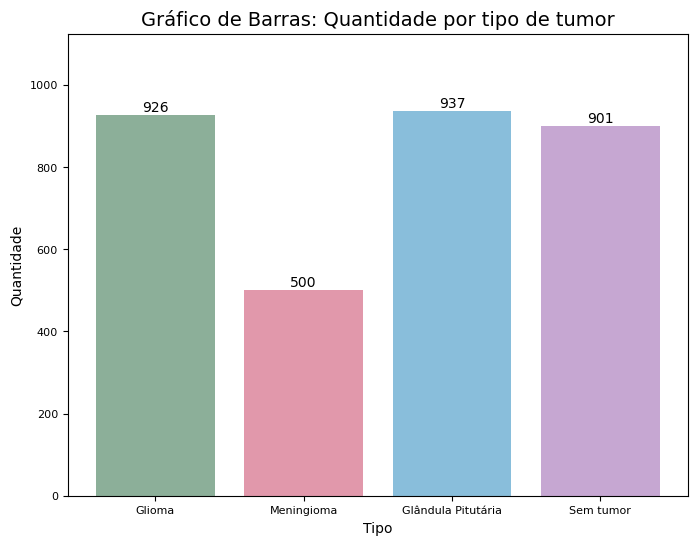

In [9]:
valores = [full_glioma, full_no_tumor, full_menignioma, full_pituitary] 

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.bar(labels, valores, color=colors)

plt.xlabel('Tipo', fontsize=10)  # Aumentar o tamanho da fonte do rótulo do eixo x
plt.ylabel('Quantidade', fontsize=10)  # Aumentar o tamanho da fonte do rótulo do eixo y

# Ajustar os limites dos eixos x e y para "zoom out"
plt.ylim(0, max(valores)*1.2)  # Defina os limites do eixo y para incluir todos os valores


# Adicionar rótulos de valores acima das barras com fonte maior
for i, v in enumerate(valores):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)  # Aumentar o tamanho da fonte dos valores

# Definir título do gráfico com fonte maior
title_bar_plot = 'Gráfico de Barras: Quantidade por tipo de tumor'
plt.title(title_bar_plot, fontsize=14)
plt.savefig(f"{title_bar_plot}.png", dpi=300)
# Mostrar o gráfico
plt.show()


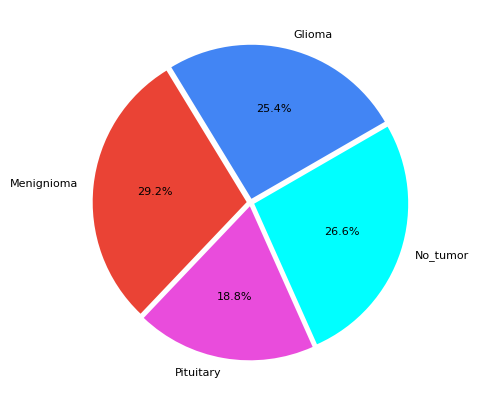

In [10]:


plt.figure(figsize=(5,5))
colors = ['#4285f4','#ea4335',"#e94cdc","#00FFFF"]
plt.rcParams.update({'font.size': 8})
plt.pie([test_glioma_number,
         test_menignioma_number,test_pituitary_number,test_no_number],
        labels=['Glioma', 'Menignioma','Pituitary','No_tumor'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);



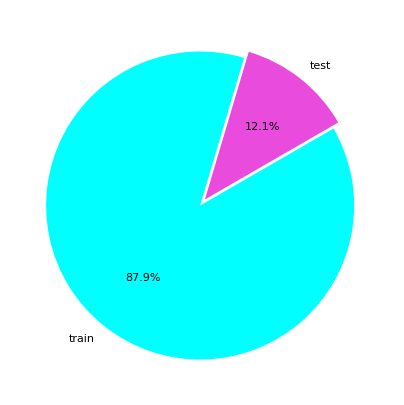

In [11]:


plt.figure(figsize=(5,5))
colors = ["#e94cdc","#00FFFF"]
plt.rcParams.update({'font.size': 8})
plt.pie([test_glioma_number+
         test_menignioma_number+test_pituitary_number+test_no_number,train_glioma_number+
         train_menignioma_number+train_pituitary_number+train_no_number],
        labels=['test', 'train'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025),
        startangle=30);



In [12]:
def images_visualization(image, title,a):#a=number of images
    plt.figure(figsize=(8,8))#image size
    for i in range(a):#number of image
        random_image_path = random.choice(image)#random selection
        img = mpimg.imread(random_image_path)
        plt.subplot(1, a, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(title)
    file = 'Imagem Normal {}.png'.format(title)
    plt.savefig(file, dpi=300)
    plt.show()
    

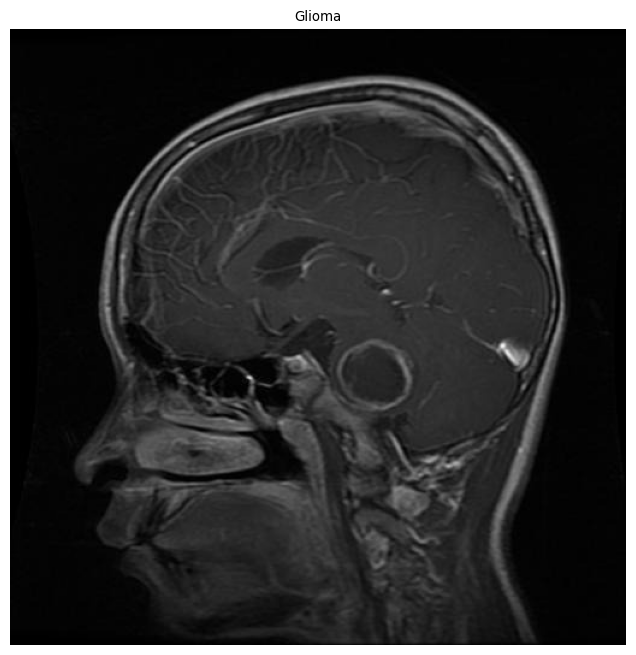

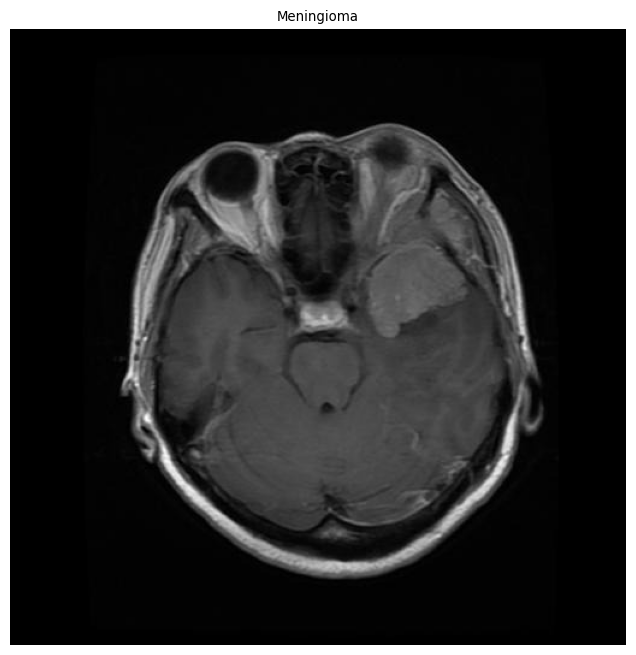

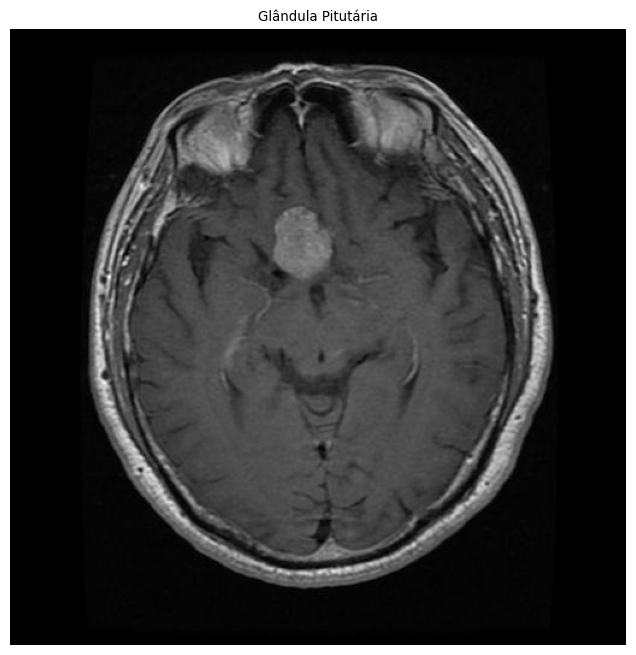

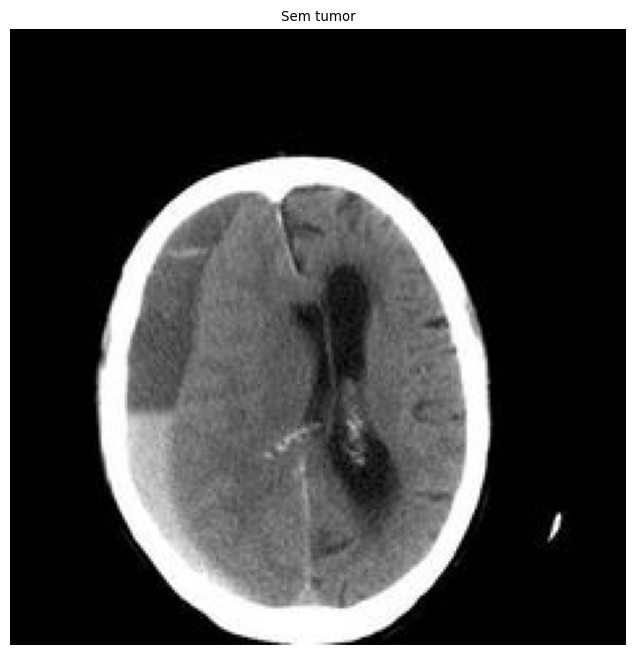

In [13]:

np.random.seed(24)
labels = ['Glioma', 'Meningioma', 'Glândula Pitutária', 'Sem tumor']

images_visualization(train_glioma, 'Glioma',1)
images_visualization(train_menignioma, 'Meningioma',1)
images_visualization(train_pituitary, 'Glândula Pitutária',1)
images_visualization(train_no, 'Sem tumor',1)

In [14]:
def clahe(image, title,a):#a=number of images
    plt.figure(figsize=(8,8))#image size
    for i in range(a):#number of image
        random_image_path = random.choice(image)#random selection
        img = cv2.imread(random_image_path) # read the image using cv2
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the image to grayscale
        clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8,8)) # create a CLAHE object with clip limit and tile grid size
        clahe_img = clahe.apply(img_gray) # apply CLAHE to the grayscale image
        plt.subplot(1, a, i+1)
        plt.imshow(clahe_img, cmap='gray') # display the filtered image using plt.imshow and cmap='grey'
        plt.axis('off')
        plt.title(title)
    plt.show()

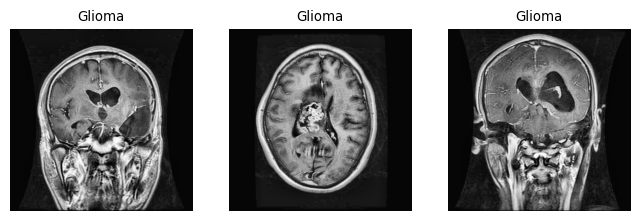

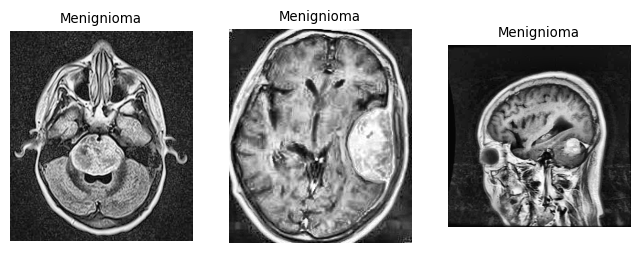

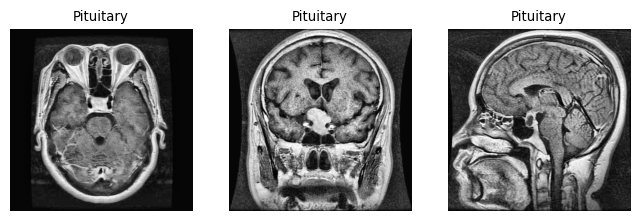

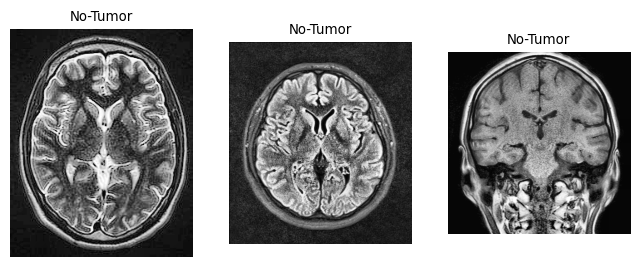

In [15]:
clahe(train_glioma, 'Glioma',3)
clahe(train_menignioma, 'Menignioma',3)
clahe(train_pituitary, 'Pituitary',3)
clahe(train_no,'No-Tumor',3)


In [16]:
def BCET(Gmin, Gmax, Gmean, img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converte a imagem para escala de cinza
    
    x =img_gray.astype(float)
    
    Lmin = np.min(x)     # MÍNIMO DA IMAGEM DE ENTRADA
    Lmax = np.max(x)     # MÁXIMO DA IMAGEM DE ENTRADA
    Lmean = np.mean(x)   # MÉDIA DA IMAGEM DE ENTRADA
    LMssum = np.mean(x**2)  # SOMA DOS QUADRADOS DA IMAGEM DE ENTRADA

    bnum = Lmax**2*(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin**2*(Gmax-Gmean)
    bden = 2*(Lmax*(Gmean-Gmin) - Lmean*(Gmax-Gmin) + Lmin*(Gmax-Gmean))

    b = bnum / bden

    a = (Gmax-Gmin) / ((Lmax-Lmin)*(Lmax+Lmin-2*b))

    c = Gmin - a*(Lmin-b)**2

    y = a*(x-b)**2 + c  # FUNÇÃO PARABÓLICA
    y = np.uint8(y)     # Converte a imagem de saída para tipo uint8


    return y

In [17]:
def plot_BCET (image, title,a, Gmin, Gmax, Gmean):
    plt.figure(figsize=(8,8))
    for i in range(a):
        random_image_path = random.choice(image)
        img = cv2.imread(random_image_path)
        BCET_img = BCET(Gmin, Gmax, Gmean, img)
        plt.subplot(1, a, i+1)
        plt.imshow(BCET_img, cmap="gray")
        plt.axis('off')
        plt.title(title)
    plt.show()

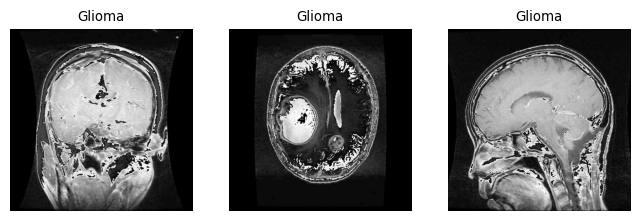

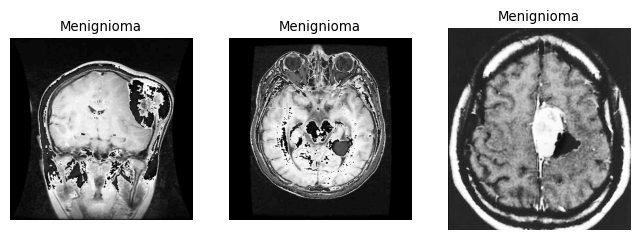

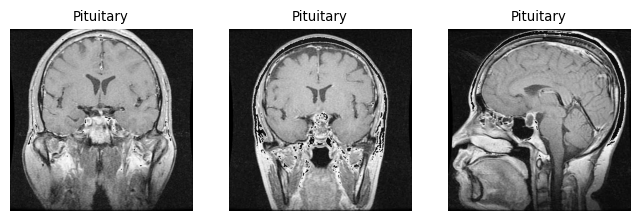

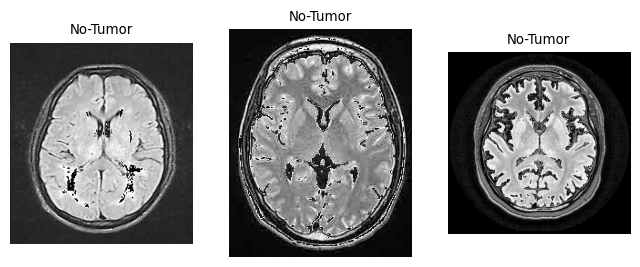

In [18]:
plot_BCET(train_glioma, 'Glioma', 3, 0, 255, 110)
plot_BCET(train_menignioma, 'Menignioma', 3, 0, 255, 110)
plot_BCET(train_pituitary, 'Pituitary', 3, 0, 255, 110)
plot_BCET(train_no, 'No-Tumor', 3, 0, 255, 110)


FileNotFoundError: [Errno 2] No such file or directory: 'Imagem Filtrada com Histograma Training pituitary_tumor\\p (536).jpg.png'

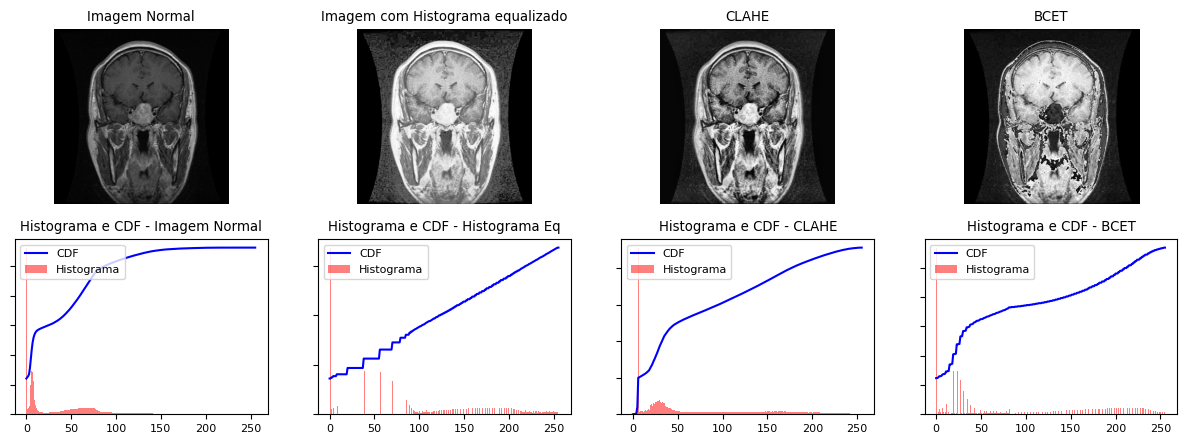

In [24]:
# IMAGEM : pituitary_tumor/p (721).jpg
# Plotando a mesma imagem com e sem os filtros
random.seed(12)
glioma = random.choice(train_pituitary)#random selection
img = cv2.imread(glioma) # read the image using cv2
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the image to grayscale

# ------- Equalização de Histograma -------
hist,bins = np.histogram(img_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img_equalized = cdf[img]

# ------- CLAHE -------

clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8,8)) # create a CLAHE object with clip limit and tile grid size
clahe_img = clahe.apply(img_gray) # apply CLAHE to the grayscale image

# -------- BCET -------
bcet_img = BCET(0, 255, 110, img)



fig, axes = plt.subplots(2,4, figsize=(15,5))
# Hiding the y label values
axes[1,0].tick_params(axis='y', which='both', labelleft=False)
axes[1,1].tick_params(axis='y', which='both', labelleft=False)
axes[1,2].tick_params(axis='y', which='both', labelleft=False)
axes[1,3].tick_params(axis='y', which='both', labelleft=False)

# Subplot 1 (normal)
axes[0,0].imshow(img_gray, cmap = 'gray')
axes[0,0].set_title("Imagem Normal")
axes[0,0].axis('off')
 

# Calcule o histograma e CDF da primeira imagem
hist1, bins1 = np.histogram(img_gray.flatten(), bins=256, range=[0, 256])
cdf1 = hist1.cumsum()
cdf_normalized1 = cdf1 * hist1.max() / cdf1.max()
axes[1, 0].plot(cdf_normalized1, color='b')
axes[1, 0].hist(img_gray.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 0].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 0].set_title('Histograma e CDF - Imagem Normal')



# Subplot 3 (Histograma equalizado)
axes[0,1].imshow(img_equalized, cmap = 'gray')
axes[0,1].set_title("Imagem com Histograma equalizado")
axes[0,1].axis('off')
 
# cdf3 = hist.cumsum()
# cdf_normalized3 = cdf * float(hist.max()) / cdf.max()
# Calcule o histograma e CDF da primeira imagem
hist2, bins2 = np.histogram(img_equalized.flatten(), bins=256, range=[0, 256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * float(hist2.max()) / cdf2.max()
axes[1, 1].plot(cdf_normalized2, color='b')
axes[1, 1].hist(img_equalized.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 1].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 1].set_title('Histograma e CDF - Histograma Eq')


# Subplot 2 (clahe)
axes[0,2].imshow(clahe_img, cmap = 'gray')
axes[0,2].set_title("CLAHE")
axes[0,2].axis('off')



# Calcule o histograma e CDF da imagem com filtro CLAHE

hist3, bins3 = np.histogram(clahe_img.flatten(), bins=256, range=[0, 256])
cdf3 = hist3.cumsum()
cdf_normalized3 = cdf3 * hist3.max() / cdf3.max()

axes[1, 2].plot(cdf_normalized3, color='b')
axes[1, 2].hist(clahe_img.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 2].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 2].set_title('Histograma e CDF - CLAHE')

# Repita o processo para a terceira imagem
axes[0, 3].imshow(bcet_img, cmap='gray')
axes[0, 3].set_title('BCET')
axes[0, 3].axis('off')

hist4, bins4 = np.histogram(bcet_img.flatten(), bins=256, range=[0, 256])
cdf4 = hist4.cumsum()
cdf_normalized4 = cdf4 * hist4.max() / cdf4.max()

axes[1, 3].plot(cdf_normalized4, color='b')
axes[1, 3].hist(bcet_img.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 3].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 3].set_title('Histograma e CDF - BCET')


#name = glioma.split('/')


plt.savefig('Imagem Filtrada com Histograma {} {}.png'.format(name[-2], name[-1]), dpi = 300)


# Exiba a figura
plt.tight_layout()
plt.show()



In [ ]:

def plot_clahe(dataset, samples, seed, n_min = 0.1, n_max=5, save_img = False, histogram=True):
    """
    This function plots some images applying CLAHE image enhancement within a range 
    equally spaced between n_min and n_max to set the clip limit in the CLAHE function.

    Args:
        dataset (string): The path where all images are located.
        samples (int): The number of samples to plot.
        seed (int): A number to ensure consistent image selection.
        n_min (float): The minimum value to set the clip limit in the CLAHE function.
        n_max (float): The maximum value to set the clip limit in the CLAHE function.
        save_img (bool): Save the image in the following path 'current_dir/CLAHE Images/...'
        histogram (bool): Plot the histogram beside the enhanced image.

    Returns:
        None
        """
    #Seed:     
    random.seed(seed)
    
    #Get an image from the random dataset     
    image = cv2.imread(random.choice(dataset))#random selection

    #Converting to grayscale     
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    array_np = np.linspace(n_min, n_max, samples)

    for i, value in enumerate(array_np):
        #Applying CLAHE enhancement          
        clahe = cv2.createCLAHE(clipLimit=value, tileGridSize=(8,8))
        clahe_img = clahe.apply(img_gray) 
    
        title = 'Clip Limit Value: {:.2f}\n Index: {}\n Kernel=8x8'.format(value,i)
        
        if(histogram):
            fig, axes = plt.subplots(1, 2, figsize=(12,5))
            hist, bins = np.histogram(clahe_img.flatten(), bins=256, range=[0, 256])
            cdf = hist.cumsum()
            cdf_normalized = cdf * hist.max() / cdf.max()
            
            for i in range(2):
                axes[i].set_facecolor('white')
                if i==0:
                    axes[i].set_title(title)
                    axes[i].imshow(clahe_img, cmap='gray')
                    axes[i].axis('off')
                else:
                    title = 'Histogram \n' + title
                    axes[i].set_title(title)
                    axes[i].hist(clahe_img.flatten(), bins=256, range=[0,256], color='r', alpha=0.5)
                    axes[i].plot(cdf_normalized, color='b') 
                    axes[i].legend(['CDF', 'Histograma'], loc='upper left')
            
            #Without histogram             
        else:
            plt.figure(figsize=(16,8));
            plt.figure(i+1, facecolor='white');
            plt.imshow(clahe_img, cmap='gray');
            plt.title(title)
            
        # Saving the images         
        if save_img:
            path = 'CLAHE Images'
            if not os.path.exists(path):
                os.makedirs(path)
            plt.savefig('{}/Clahe {}.jpg'.format(path, title), dpi = 300)    
        
        plt.tight_layout()
        plt.show()

# plot_clahe(train_pituitary, 15, 12, save_img = True, histogram=False)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import shannon_entropy
random.seed(12)
#Get an image from the random dataset     

image_link = random.choice(train_pituitary)

imagem = cv2.imread(image_link)#random selection
img_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Carregar a imagem de entrada
# imagem = cv2.imread('sua_imagem.jpg', cv2.IMREAD_GRAYSCALE)
# Aplicar uma melhoria de contraste (por exemplo, usando a equalização de histograma)

clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8,8))

imagem_melhorada = clahe.apply(img_gray)


# Calcular a entropia da imagem original
entropia_original = shannon_entropy(imagem)

# Calcular a entropia da imagem após a melhoria de contraste
entropia_melhorada = shannon_entropy(imagem_melhorada)

# Exibir as imagens para visualização
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(132)
plt.imshow(imagem_melhorada, cmap='gray')
plt.title('Imagem Melhorada com Contraste')

plt.tight_layout()
plt.show()

# Exibir a entropia calculada
print(f'Entropia da Imagem Original: {entropia_original:.2f}')
print(f'Entropia da Imagem Melhorada: {entropia_melhorada:.2f}')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Converter a imagem para escala de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Equalizar o histograma
    equalized_image = cv2.equalizeHist(gray)

    # Calcular o histograma da imagem equalizada
    hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
    hist_equalized /= hist_equalized.sum()  # Normalizar o histograma

    # Calcular a Função de Distribuição Cumulativa (CDF) do histograma equalizado
    cdf_equalized = hist_equalized.cumsum() / hist_equalized.sum()

    return gray, equalized_image, hist_equalized, cdf_equalized

# Carregar a imagem
image = cv2.imread('sua_imagem.jpg', cv2.IMREAD_COLOR)

# Aplicar a equalização de histograma e converter para preto e branco
gray, equalized_image, hist_equalized, cdf_equalized = histogram_equalization(image)

# Plotar a imagem original
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')

# Plotar o histograma da imagem original com CDF
plt.subplot(2, 2, 2)
plt.hist(gray.ravel(), 256, [0, 256], density=True, color='b', alpha=0.7, label='Histograma Original')
plt.plot(cdf_equalized, color='r', label='CDF Equalizada')
plt.legend(loc='upper right')
plt.title('Histograma Original com CDF')

# Plotar a imagem equalizada
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Imagem Equalizada')

# Plotar o histograma da imagem equalizada
plt.subplot(2, 2, 4)
plt.hist(equalized_image.ravel(), 256, [0, 256], density=True, color='g', alpha=0.7, label='Histograma Equalizado')
plt.legend(loc='upper right')
plt.title('Histograma Equalizado')

plt.tight_layout()
plt.show()


In [ ]:
# IMAGEM : pituitary_tumor/p (721).jpg
# Plotando a mesma imagem com e sem os filtros
random.seed(12)
glioma = random.choice(train_pituitary)#random selection
img = cv2.imread(glioma) # read the image using cv2
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the image to grayscale

# ------- Equalização de Histograma -------
hist,bins = np.histogram(img_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img_equalized = cdf[img]

# ------- CLAHE -------

clahe = cv2.createCLAHE(clipLimit=2.9, tileGridSize=(8,8)) # create a CLAHE object with clip limit and tile grid size
clahe_img = clahe.apply(img_gray) # apply CLAHE to the grayscale image

# -------- BCET -------
bcet_img = BCET(0, 255, 110, img)



fig, axes = plt.subplots(2,4, figsize=(15,5))
# Hiding the y label values
axes[1,0].tick_params(axis='y', which='both', labelleft=False)
axes[1,1].tick_params(axis='y', which='both', labelleft=False)
axes[1,2].tick_params(axis='y', which='both', labelleft=False)
axes[1,3].tick_params(axis='y', which='both', labelleft=False)

# Subplot 1 (normal)
axes[0,0].imshow(img_gray, cmap = 'gray')
axes[0,0].set_title("Imagem Normal")
axes[0,0].axis('off')
 

# Calcule o histograma e CDF da primeira imagem
hist1, bins1 = np.histogram(img_gray.flatten(), bins=256, range=[0, 256])
cdf1 = hist1.cumsum()
cdf_normalized1 = cdf1 * hist1.max() / cdf1.max()
axes[1, 0].plot(cdf_normalized1, color='b')
axes[1, 0].hist(img_gray.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 0].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 0].set_title('Histograma e CDF - Imagem Normal')



# Subplot 3 (Histograma equalizado)
axes[0,2].imshow(img_equalized, cmap = 'gray')
axes[0,2].set_title("Imagem com Histograma equalizado")
axes[0,2].axis('off')
 
# Subplot 2 (clahe)
axes[0,1].imshow(clahe_img, cmap = 'gray')
axes[0,1].set_title("CLAHE")
axes[0,1].axis('off')



# Calcule o histograma e CDF da imagem com filtro CLAHE

hist3, bins3 = np.histogram(clahe_img.flatten(), bins=256, range=[0, 256])
cdf3 = hist3.cumsum()
cdf_normalized3 = cdf3 * hist3.max() / cdf3.max()

axes[1, 1].plot(cdf_normalized3, color='b')
axes[1, 1].hist(clahe_img.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 1].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 1].set_title('Histograma e CDF - CLAHE')
    
    
    
    
# cdf3 = hist.cumsum()
# cdf_normalized3 = cdf * float(hist.max()) / cdf.max()
# Calcule o histograma e CDF da primeira imagem
hist2, bins2 = np.histogram(img_equalized.flatten(), bins=256, range=[0, 256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * float(hist2.max()) / cdf2.max()
axes[1, 2].plot(cdf_normalized2, color='b')
axes[1, 2].hist(img_equalized.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 2].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 2].set_title('Histograma e CDF - Histograma Eq')



# Repita o processo para a terceira imagem
axes[0, 3].imshow(bcet_img, cmap='gray')
axes[0, 3].set_title('BCET')
axes[0, 3].axis('off')

hist4, bins4 = np.histogram(bcet_img.flatten(), bins=256, range=[0, 256])
cdf4 = hist4.cumsum()
cdf_normalized4 = cdf4 * hist4.max() / cdf4.max()

axes[1, 3].plot(cdf_normalized4, color='b')
axes[1, 3].hist(bcet_img.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 3].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 3].set_title('Histograma e CDF - BCET')


name = glioma.split('/')
plt.savefig('Comparativo NORMAL CLAHE .png', dpi = 300)


# Exiba a figura
plt.tight_layout()
plt.show()



In [ ]:
# EXEMPLO DE USO DA EQUALIZAÇÃO DE HISTOGRAMA
# Plotando a mesma imagem com e sem os filtros
image = cv2.imread('low_contast.png')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert the image to grayscale

# ------- Equalização de Histograma -------
hist,bins = np.histogram(img_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img_equalized = cdf[img_gray]

# ------- CLAHE -------

clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8,8)) # create a CLAHE object with clip limit and tile grid size
clahe_img = clahe.apply(img_gray) # apply CLAHE to the grayscale image

# -------- BCET -------
bcet_img = BCET(0, 255, 110, img)



fig, axes = plt.subplots(2,2, figsize=(15,5))
# Hiding the y label values
axes[1,0].tick_params(axis='y', which='both', labelleft=False)
axes[1,1].tick_params(axis='y', which='both', labelleft=False)

# Subplot 1 (normal)
axes[0,0].imshow(img_gray, cmap = 'gray')
axes[0,0].set_title("Imagem Normal")
axes[0,0].axis('off')
 

# Calcule o histograma e CDF da primeira imagem
hist1, bins1 = np.histogram(img_gray.flatten(), bins=256, range=[0, 256])
cdf1 = hist1.cumsum()
cdf_normalized1 = cdf1 * hist1.max() / cdf1.max()
axes[1, 0].plot(cdf_normalized1, color='b')
axes[1, 0].hist(img_gray.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 0].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 0].set_title('Histograma e CDF - Imagem Normal')



# Subplot 3 (Histograma equalizado)
axes[0,1].imshow(img_equalized, cmap = 'gray')
axes[0,1].set_title("Imagem com Histograma equalizado")
axes[0,1].axis('off')
 
# cdf3 = hist.cumsum()
# cdf_normalized3 = cdf * float(hist.max()) / cdf.max()
# Calcule o histograma e CDF da primeira imagem
hist2, bins2 = np.histogram(img_equalized.flatten(), bins=256, range=[0, 256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * float(hist2.max()) / cdf2.max()
axes[1, 1].plot(cdf_normalized2, color='b')
axes[1, 1].hist(img_equalized.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 1].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 1].set_title('Histograma e CDF - Histograma Eq')




plt.savefig('exemplo - EQ hist.png', dpi = 300)


# Exiba a figura
plt.tight_layout()
plt.show()



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o histograma acumulativo (CDF)
def calculate_cdf(histogram):
    cdf = np.cumsum(histogram)
    cdf_normalized = cdf / cdf[-1]  # Normalize o CDF
    return cdf_normalized

# Carregue a imagem
image = cv2.imread('p (721).jpg', cv2.IMREAD_GRAYSCALE)

# Calcule o histograma da imagem
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Calcule o CDF do histograma
cdf = calculate_cdf(hist)

# Crie uma figura com subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot do histograma em barras
ax.bar(range(256), hist[:, 0], color='blue', alpha=0.7, label='Histograma')
ax.set_xlabel('Níveis de Cinza')
ax.set_ylabel('Frequência', color='blue')
ax.set_xlim(0, 255)
ax.set_title('Histograma em Barras e CDF da Imagem')
ax.legend(loc='upper left')

# Crie o segundo eixo y para o CDF
ax2 = ax.twinx()
ax2.plot(cdf, color='red', label='CDF')
ax2.set_ylabel('CDF', color='red')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

# Ajuste o layout
fig.tight_layout()

# Exiba o gráfico
plt.show()
